In [15]:
#importing modules
import matplotlib.pyplot as plt
import os
import tensorflow as tf
import matplotlib

matplotlib.style.use('ggplot')

In [16]:
#data generation


datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255
)

train_generator = datagen.flow_from_directory(
    directory=r"C:\Users\asua\Documents\ASL\asl_alphabet_train",
    target_size=(200, 200),
    color_mode="rgb",
    batch_size=32,
    class_mode="categorical",
    shuffle=True,
    seed=42
)

valid_generator = datagen.flow_from_directory(
    directory=r"C:\Users\asua\Documents\ASL\asl_alphabet_val",
    target_size=(200, 200),
    color_mode="rgb",
    batch_size=32,
    class_mode="categorical",
    shuffle=True,
    seed=42
)





Found 69252 images belonging to 29 classes.
Found 17400 images belonging to 29 classes.


# Model 1: SIMPLE CONVNET+MAX POOLING (BASE MODEL)

In [17]:
#model definition

def build_model(num_classes):
    model = tf.keras.Sequential([
    
    
    tf.keras.layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu',input_shape= (200,200,3)),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2),
    tf.keras.layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu'),
    
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2),
    tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu'),
   
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(num_classes, activation='softmax')
    ])
    return model

In [18]:
model1 = build_model(num_classes=29)

In [19]:
#compiling
model1.compile(
    optimizer=tf.keras.optimizers.Adam(lr=0.001),
    loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

C:\Users\asua\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


In [20]:
#checking number of parameters
print(model1.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 198, 198, 16)      448       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 99, 99, 16)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 97, 97, 16)        2320      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 48, 48, 16)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 46, 46, 32)        4640      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 23, 23, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 16928)            

In [21]:
EPOCHS = 15
BATCH_SIZE = 128
history1 = model1.fit(train_generator,
                    steps_per_epoch=train_generator.samples // BATCH_SIZE,
                    epochs=EPOCHS,
                    validation_data=valid_generator,
                    validation_steps= valid_generator.samples // BATCH_SIZE,
                    verbose=1
                    )

C:\Users\asua\anaconda3\lib\site-packages\tensorflow\python\keras\backend.py:4869: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  warnings.warn(


Epoch 1/15
541/541 [==============================] - 231s 426ms/step - loss: 2.1619 - accuracy: 0.3749 - val_loss: 1.8913 - val_accuracy: 0.4486
Epoch 2/15
541/541 [==============================] - 232s 429ms/step - loss: 0.7799 - accuracy: 0.7495 - val_loss: 1.9396 - val_accuracy: 0.5514
Epoch 3/15
541/541 [==============================] - 229s 424ms/step - loss: 0.4061 - accuracy: 0.8669 - val_loss: 1.9397 - val_accuracy: 0.6169
Epoch 4/15
541/541 [==============================] - 229s 424ms/step - loss: 0.2704 - accuracy: 0.9117 - val_loss: 1.9834 - val_accuracy: 0.6123
Epoch 5/15
541/541 [==============================] - 237s 439ms/step - loss: 0.1804 - accuracy: 0.9396 - val_loss: 2.3048 - val_accuracy: 0.6306
Epoch 6/15
541/541 [==============================] - 231s 426ms/step - loss: 0.1535 - accuracy: 0.9503 - val_loss: 2.7071 - val_accuracy: 0.6164
Epoch 7/15
541/541 [==============================] - 218s 403ms/step - loss: 0.1047 - accuracy: 0.9644 - val_loss: 2.9924 -

In [22]:
train_loss1 = history1.history['loss']
train_acc1 = history1.history['accuracy']
valid_loss1 = history1.history['val_loss']
valid_acc1 = history1.history['val_accuracy']

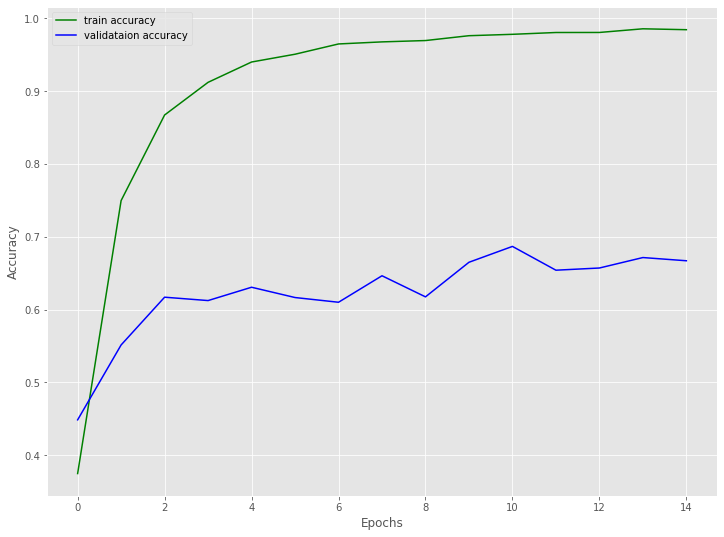

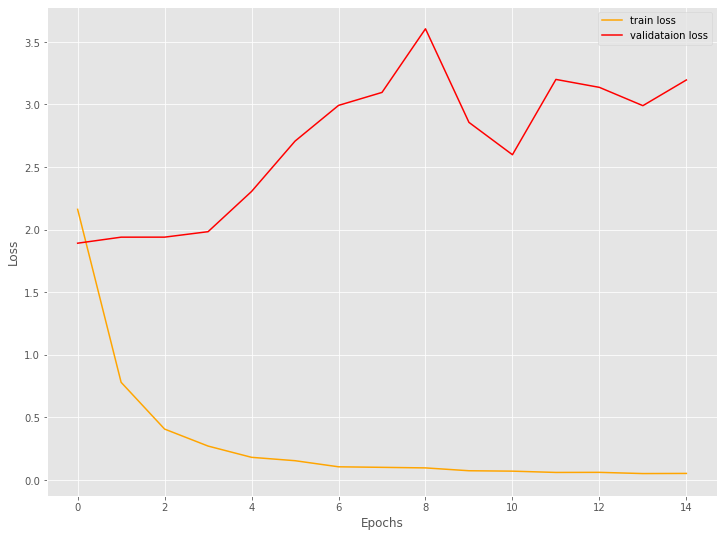

In [24]:
def save_plots(train_acc1, valid_acc1, train_loss1, valid_loss1):
    """
    Function to save the loss and accuracy plots to disk.
    """
    # accuracy plots
    plt.figure(figsize=(12, 9))
    plt.plot(
        train_acc1, color='green', linestyle='-', 
        label='train accuracy'
    )
    plt.plot(
        valid_acc1, color='blue', linestyle='-', 
        label='validataion accuracy'
    )
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.savefig('accuracy.png')
    plt.show()
    # loss plots
    plt.figure(figsize=(12, 9))
    plt.plot(
        train_loss1, color='orange', linestyle='-', 
        label='train loss'
    )
    plt.plot(
        valid_loss1, color='red', linestyle='-', 
        label='validataion loss'
    )
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.savefig('loss.png')
    plt.show()

save_plots(train_acc1, valid_acc1, train_loss1, valid_loss1)

# Model 2 : CONVNET+MAXPOOL+DROPOUT (IN FC LAYERS)

In [25]:
#model definition

def build_model(num_classes):
    model2 = tf.keras.Sequential([
   
    tf.keras.layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu',input_shape= (200,200,3)),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2),
    tf.keras.layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2),
    tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(num_classes, activation='softmax')
    ])
    return model2

In [26]:
model2 = build_model(num_classes=29)

In [27]:
#compiling
model2.compile(
    optimizer=tf.keras.optimizers.Adam(lr=0.001),
    loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

In [28]:
#checking number of parameters
print(model2.summary())

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 198, 198, 16)      448       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 99, 99, 16)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 97, 97, 16)        2320      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 48, 48, 16)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 46, 46, 32)        4640      
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 23, 23, 32)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 16928)            

In [29]:
EPOCHS = 20
BATCH_SIZE = 128
history2 = model2.fit(train_generator,
                    steps_per_epoch=train_generator.samples // BATCH_SIZE,
                    epochs=EPOCHS,
                    validation_data=valid_generator,
                    validation_steps= valid_generator.samples // BATCH_SIZE,
                    verbose=1
                    )

Epoch 1/20
541/541 [==============================] - 240s 443ms/step - loss: 2.9934 - accuracy: 0.1353 - val_loss: 2.1861 - val_accuracy: 0.3148
Epoch 2/20
541/541 [==============================] - 228s 422ms/step - loss: 1.9855 - accuracy: 0.3619 - val_loss: 1.5166 - val_accuracy: 0.4921
Epoch 3/20
541/541 [==============================] - 233s 432ms/step - loss: 1.4290 - accuracy: 0.5061 - val_loss: 1.1587 - val_accuracy: 0.5912
Epoch 4/20
541/541 [==============================] - 242s 447ms/step - loss: 1.1686 - accuracy: 0.5853 - val_loss: 1.1400 - val_accuracy: 0.6162
Epoch 5/20
541/541 [==============================] - 237s 439ms/step - loss: 1.0030 - accuracy: 0.6342 - val_loss: 1.0409 - val_accuracy: 0.6639
Epoch 6/20
541/541 [==============================] - 239s 441ms/step - loss: 0.8629 - accuracy: 0.6814 - val_loss: 1.1852 - val_accuracy: 0.6391
Epoch 7/20
541/541 [==============================] - 242s 447ms/step - loss: 0.7930 - accuracy: 0.7090 - val_loss: 1.1844 -

In [30]:
train_loss_2 = history2.history['loss']
train_acc_2 = history2.history['accuracy']
valid_loss_2 = history2.history['val_loss']
valid_acc_2 = history2.history['val_accuracy']

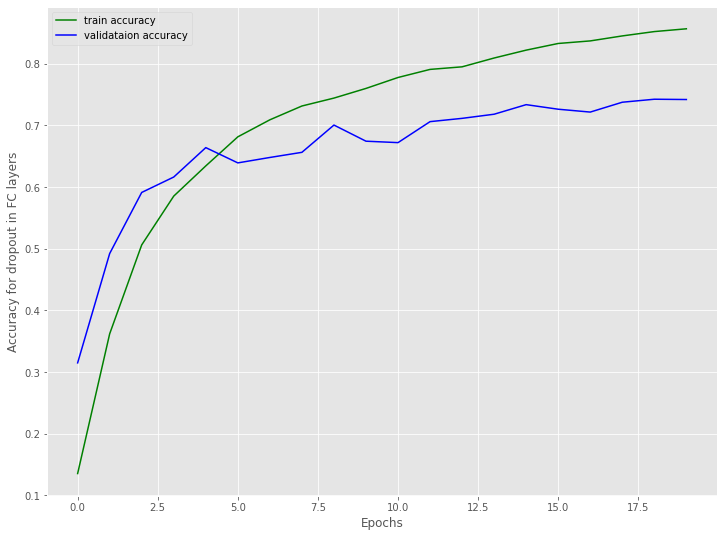

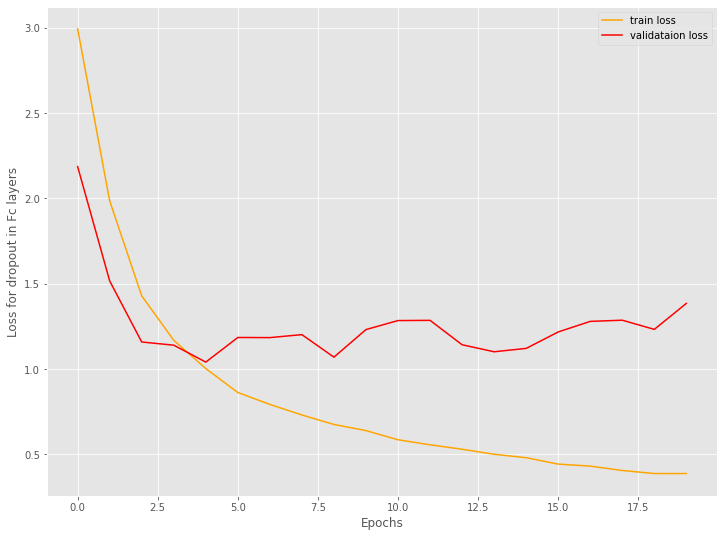

In [31]:
def save_plots(train_acc_2, valid_acc_2, train_loss_2, valid_loss_2):
    """
    Function to save the loss and accuracy plots to disk.
    """
    # accuracy plots
    plt.figure(figsize=(12, 9))
    plt.plot(
        train_acc_2, color='green', linestyle='-', 
        label='train accuracy'
    )
    plt.plot(
        valid_acc_2, color='blue', linestyle='-', 
        label='validataion accuracy'
    )
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy for dropout in FC layers')
    plt.legend()
    plt.savefig('accuracy.png')
    plt.show()
    # loss plots
    plt.figure(figsize=(12, 9))
    plt.plot(
        train_loss_2, color='orange', linestyle='-', 
        label='train loss'
    )
    plt.plot(
        valid_loss_2, color='red', linestyle='-', 
        label='validataion loss'
    )
    plt.xlabel('Epochs')
    plt.ylabel('Loss for dropout in Fc layers')
    plt.legend()
    plt.savefig('loss.png')
    plt.show()

save_plots(train_acc_2, valid_acc_2, train_loss_2, valid_loss_2)

# Model 3 : CONVNET+AVERAGE POOLING

In [32]:
#model definition

def build_model(num_classes):
    model3 = tf.keras.Sequential([
    
    tf.keras.layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu',input_shape= (200,200,3)),
    tf.keras.layers.AveragePooling2D(pool_size=(2, 2), strides=2),
    tf.keras.layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.AveragePooling2D(pool_size=(2, 2), strides=2),
    tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.AveragePooling2D(pool_size=(2, 2), strides=2),
    tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation= 'relu'),
    tf.keras.layers.AveragePooling2D(pool_size=(2, 2), strides=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(num_classes, activation='softmax')
    ])
    return model3


model3 = build_model(num_classes=29)

In [33]:
#compiling
model3.compile(
    optimizer=tf.keras.optimizers.Adam(lr=0.001),
    loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

In [34]:
#checking number of parameters
print(model3.summary())

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 198, 198, 16)      448       
_________________________________________________________________
average_pooling2d (AveragePo (None, 99, 99, 16)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 97, 97, 16)        2320      
_________________________________________________________________
average_pooling2d_1 (Average (None, 48, 48, 16)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 46, 46, 32)        4640      
_________________________________________________________________
average_pooling2d_2 (Average (None, 23, 23, 32)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 21, 21, 32)       

In [35]:
EPOCHS = 20
BATCH_SIZE = 128
history3 = model3.fit(train_generator,
                    steps_per_epoch=train_generator.samples // BATCH_SIZE,
                    epochs=EPOCHS,
                    validation_data=valid_generator,
                    validation_steps= valid_generator.samples // BATCH_SIZE,
                    verbose=1
                    )

Epoch 1/20
541/541 [==============================] - 224s 412ms/step - loss: 2.5782 - accuracy: 0.2509 - val_loss: 1.9622 - val_accuracy: 0.4410
Epoch 2/20
541/541 [==============================] - 211s 390ms/step - loss: 1.1125 - accuracy: 0.6480 - val_loss: 1.5929 - val_accuracy: 0.5725
Epoch 3/20
541/541 [==============================] - 215s 398ms/step - loss: 0.6589 - accuracy: 0.7828 - val_loss: 1.6539 - val_accuracy: 0.6211
Epoch 4/20
541/541 [==============================] - 215s 398ms/step - loss: 0.4801 - accuracy: 0.8396 - val_loss: 1.5384 - val_accuracy: 0.6819
Epoch 5/20
541/541 [==============================] - 216s 399ms/step - loss: 0.3454 - accuracy: 0.8846 - val_loss: 2.0125 - val_accuracy: 0.6734
Epoch 6/20
541/541 [==============================] - 217s 401ms/step - loss: 0.2627 - accuracy: 0.9123 - val_loss: 1.8951 - val_accuracy: 0.6870
Epoch 7/20
541/541 [==============================] - 210s 387ms/step - loss: 0.2020 - accuracy: 0.9310 - val_loss: 2.2771 -

In [36]:
train_loss_3 = history3.history['loss']
train_acc_3 = history3.history['accuracy']
valid_loss_3 = history3.history['val_loss']
valid_acc_3 = history3.history['val_accuracy']

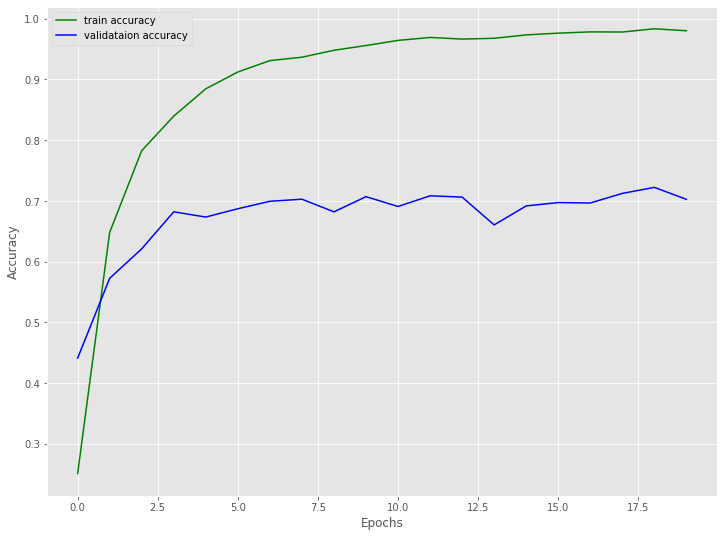

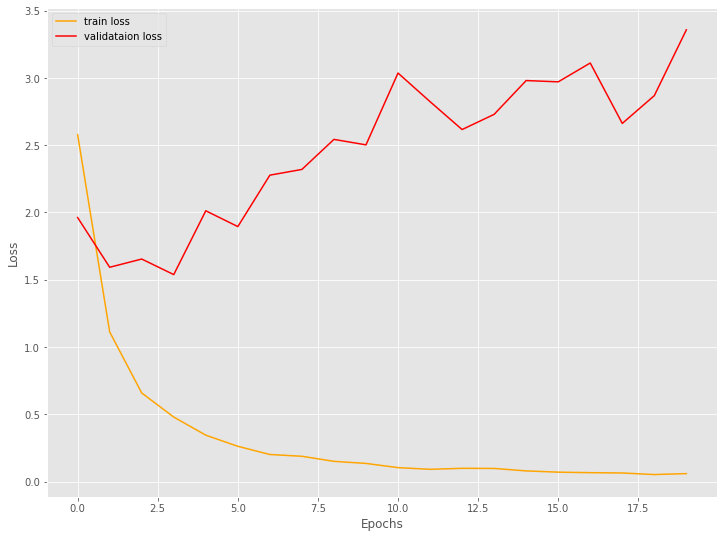

In [37]:
def save_plots(train_acc_3, valid_acc_3, train_loss_3, valid_loss_3):
    """
    Function to save the loss and accuracy plots to disk.
    """
    # accuracy plots
    plt.figure(figsize=(12, 9))
    plt.plot(
        train_acc_3, color='green', linestyle='-', 
        label='train accuracy'
    )
    plt.plot(
        valid_acc_3, color='blue', linestyle='-', 
        label='validataion accuracy'
    )
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.savefig('accuracy.png')
    plt.show()
    # loss plots
    plt.figure(figsize=(12, 9))
    plt.plot(
        train_loss_3, color='orange', linestyle='-', 
        label='train loss'
    )
    plt.plot(
        valid_loss_3, color='red', linestyle='-', 
        label='validataion loss'
    )
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.savefig('loss.png')
    plt.show()

save_plots(train_acc_3, valid_acc_3, train_loss_3, valid_loss_3)

# Model 4: CONVNET+MAXPOOL+DROPOUT (IN ALL LAYERS)

In [38]:
#model definition

def build_model(num_classes):
    model4 = tf.keras.Sequential([
    
    tf.keras.layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu',input_shape= (200,200,3)),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2),
    tf.keras.layers.Dropout(0.15),
    
    tf.keras.layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2),
    tf.keras.layers.Dropout(0.15),
        
    tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2),
    tf.keras.layers.Dropout(0.15),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(num_classes, activation='softmax')
    ])
    return model4


model4 = build_model(num_classes=29)

In [39]:
#compiling
model4.compile(
    optimizer=tf.keras.optimizers.Adam(lr=0.001),
    loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

In [40]:
#checking number of parameters
print(model4.summary())

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 198, 198, 16)      448       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 99, 99, 16)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 99, 99, 16)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 97, 97, 16)        2320      
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 48, 48, 16)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 48, 48, 16)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 46, 46, 32)       

In [41]:
EPOCHS = 20
BATCH_SIZE = 128
history4 = model4.fit(train_generator,
                    steps_per_epoch=train_generator.samples // BATCH_SIZE,
                    epochs=EPOCHS,
                    validation_data=valid_generator,
                    validation_steps= valid_generator.samples // BATCH_SIZE,
                    verbose=1
                    )

Epoch 1/20
541/541 [==============================] - 240s 443ms/step - loss: 2.9631 - accuracy: 0.1424 - val_loss: 2.1846 - val_accuracy: 0.3220
Epoch 2/20
541/541 [==============================] - 233s 430ms/step - loss: 1.9027 - accuracy: 0.3745 - val_loss: 1.4829 - val_accuracy: 0.4919
Epoch 3/20
541/541 [==============================] - 244s 451ms/step - loss: 1.4434 - accuracy: 0.5044 - val_loss: 1.2570 - val_accuracy: 0.5669
Epoch 4/20
541/541 [==============================] - 233s 430ms/step - loss: 1.2019 - accuracy: 0.5793 - val_loss: 1.2722 - val_accuracy: 0.5748
Epoch 5/20
541/541 [==============================] - 243s 449ms/step - loss: 1.0757 - accuracy: 0.6182 - val_loss: 1.2259 - val_accuracy: 0.6229
Epoch 6/20
541/541 [==============================] - 232s 429ms/step - loss: 0.9549 - accuracy: 0.6609 - val_loss: 1.3341 - val_accuracy: 0.6137
Epoch 7/20
541/541 [==============================] - 235s 435ms/step - loss: 0.8669 - accuracy: 0.6921 - val_loss: 1.0955 -

In [42]:
train_loss_4 = history4.history['loss']
train_acc_4 = history4.history['accuracy']
valid_loss_4 = history4.history['val_loss']
valid_acc_4 = history4.history['val_accuracy']

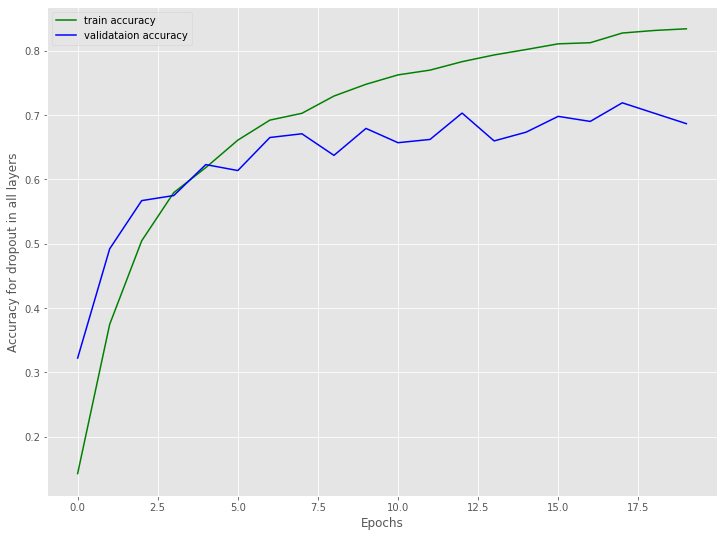

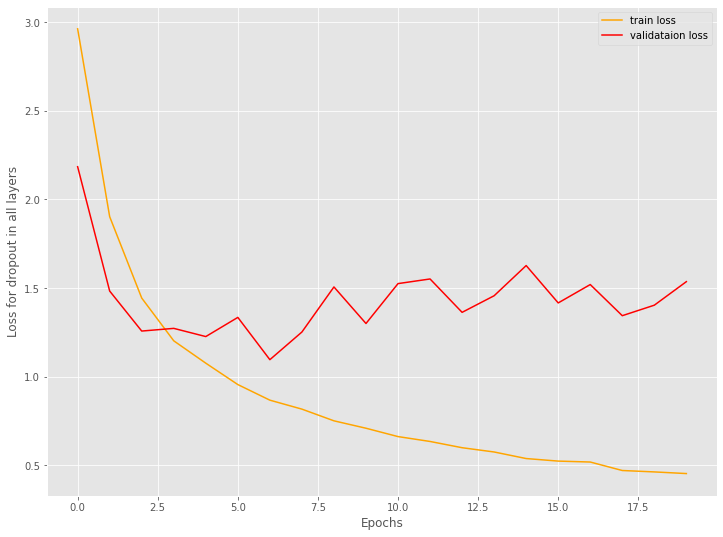

In [43]:
def save_plots(train_acc_4, valid_acc_4, train_loss_4, valid_loss_4):
    """
    Function to save the loss and accuracy plots to disk.
    """
    # accuracy plots
    plt.figure(figsize=(12, 9))
    plt.plot(
        train_acc_4, color='green', linestyle='-', 
        label='train accuracy'
    )
    plt.plot(
        valid_acc_4, color='blue', linestyle='-', 
        label='validataion accuracy'
    )
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy for dropout in all layers')
    plt.legend()
    plt.savefig('accuracy.png')
    plt.show()
    # loss plots
    plt.figure(figsize=(12, 9))
    plt.plot(
        train_loss_4, color='orange', linestyle='-', 
        label='train loss'
    )
    plt.plot(
        valid_loss_4, color='red', linestyle='-', 
        label='validataion loss'
    )
    plt.xlabel('Epochs')
    plt.ylabel('Loss for dropout in all layers')
    plt.legend()
    plt.savefig('loss.png')
    plt.show()

save_plots(train_acc_4, valid_acc_4, train_loss_4, valid_loss_4)

# Model 5 :  ADDING L2 REGULARIZATION


In [44]:


#model definition

def build_model(num_classes):
    model5 = tf.keras.Sequential([
    
    
    tf.keras.layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu',input_shape= (200,200,3),kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2),
    
    tf.keras.layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2),
        
    tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(num_classes, activation='softmax')
    ])
    return model5


model5 = build_model(num_classes=29)

In [45]:
#compiling
model5.compile(
    optimizer=tf.keras.optimizers.Adam(lr=0.001),
    loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

In [46]:
#checking number of parameters
print(model5.summary())

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_19 (Conv2D)           (None, 198, 198, 16)      448       
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 99, 99, 16)        0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 97, 97, 16)        2320      
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 48, 48, 16)        0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 46, 46, 32)        4640      
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 23, 23, 32)        0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 16928)            

In [47]:
EPOCHS = 20
BATCH_SIZE = 128
history5 = model5.fit(train_generator,
                    steps_per_epoch=train_generator.samples // BATCH_SIZE,
                    epochs=EPOCHS,
                    validation_data=valid_generator,
                    validation_steps= valid_generator.samples // BATCH_SIZE,
                    verbose=1
                    )

Epoch 1/20
541/541 [==============================] - 223s 412ms/step - loss: 3.1322 - accuracy: 0.1177 - val_loss: 2.5896 - val_accuracy: 0.2808
Epoch 2/20
541/541 [==============================] - 221s 408ms/step - loss: 2.3361 - accuracy: 0.3009 - val_loss: 2.1593 - val_accuracy: 0.3532
Epoch 3/20
541/541 [==============================] - 217s 401ms/step - loss: 2.0308 - accuracy: 0.3851 - val_loss: 1.9310 - val_accuracy: 0.4340
Epoch 4/20
541/541 [==============================] - 218s 404ms/step - loss: 1.8693 - accuracy: 0.4361 - val_loss: 1.7672 - val_accuracy: 0.4921
Epoch 5/20
541/541 [==============================] - 216s 398ms/step - loss: 1.7731 - accuracy: 0.4721 - val_loss: 1.8189 - val_accuracy: 0.5023
Epoch 6/20
541/541 [==============================] - 216s 398ms/step - loss: 1.6844 - accuracy: 0.5002 - val_loss: 1.6532 - val_accuracy: 0.5407
Epoch 7/20
541/541 [==============================] - 216s 399ms/step - loss: 1.5909 - accuracy: 0.5355 - val_loss: 1.7608 -

In [48]:
train_loss_5 = history5.history['loss']
train_acc_5 = history5.history['accuracy']
valid_loss_5 = history5.history['val_loss']
valid_acc_5 = history5.history['val_accuracy']

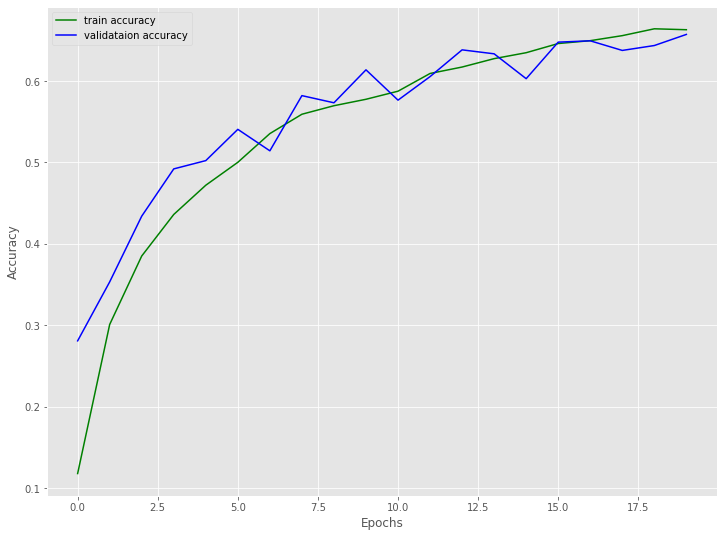

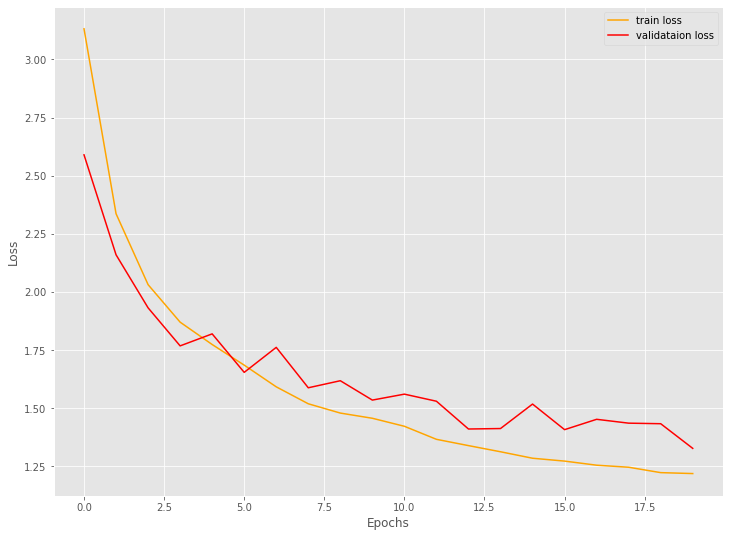

In [49]:
def save_plots(train_acc_5, valid_acc_5, train_loss_5, valid_loss_5):
    """
    Function to save the loss and accuracy plots to disk.
    """
    # accuracy plots
    plt.figure(figsize=(12, 9))
    plt.plot(
        train_acc_5, color='green', linestyle='-', 
        label='train accuracy'
    )
    plt.plot(
        valid_acc_5, color='blue', linestyle='-', 
        label='validataion accuracy'
    )
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.savefig('accuracy.png')
    plt.show()
    # loss plots
    plt.figure(figsize=(12, 9))
    plt.plot(
        train_loss_5, color='orange', linestyle='-', 
        label='train loss'
    )
    plt.plot(
        valid_loss_5, color='red', linestyle='-', 
        label='validataion loss'
    )
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.savefig('loss.png')
    plt.show()

save_plots(train_acc_5, valid_acc_5, train_loss_5, valid_loss_5)